In [2]:
%pip install scikit-learn

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Program Files (x86)\Microsoft Visual Studio\Shared\Python39_64\python.exe -m pip install --upgrade pip' command.


In [3]:
from preprocessing.data_loader import DataLoader
from preprocessing.data_processor import DataProcessor 
from PCA.PCA import imlPCA

# **1. Plot the original data set**

In [4]:
# Initialize PCA
pca = imlPCA()

## --- Step 1 --- ##
# Initialize DataLoader and DataProcessor
data_loader    = DataLoader()
data_processor = DataProcessor()

# Load Datasets
df_satimage, labels_satimage = data_loader.load_arff_data('satimage')
df_splice,   labels_splice   = data_loader.load_arff_data('splice')

# Preprocess Datasets
df_satimage = data_processor.preprocess_dataset(df_satimage)
df_splice   = data_processor.preprocess_dataset(df_splice)


--- Step 2: Plotting Original Satimage Dataset ---


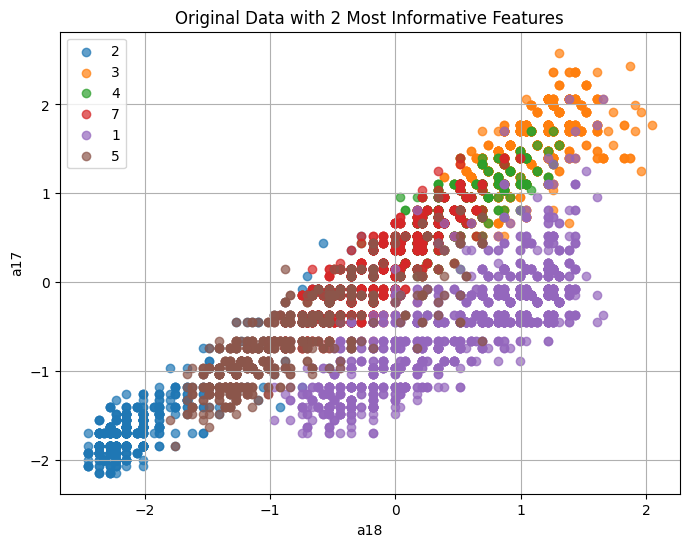

In [5]:
## --- Step 2: Plot Original Datasets --- ##
print("\n--- Step 2: Plotting Original Satimage Dataset ---")
pca.plot_original_dataset(df_satimage, labels_satimage, 2)


--- Step 2: Plotting Original Splice Dataset ---


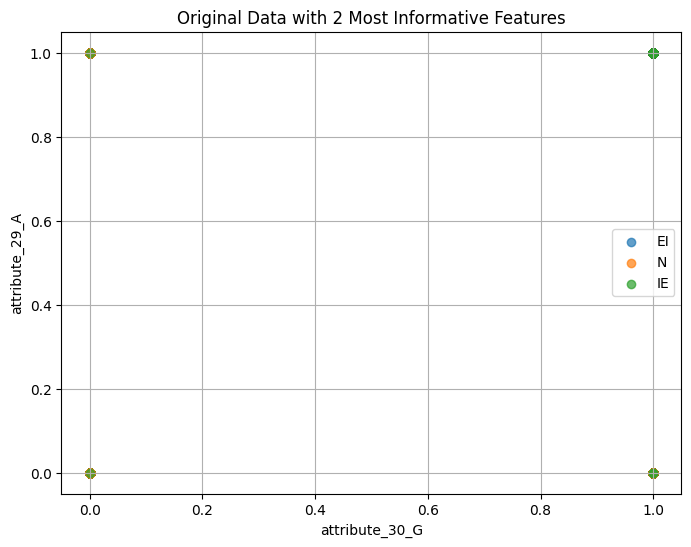

In [6]:
print("\n--- Step 2: Plotting Original Splice Dataset ---")
pca.plot_original_dataset(df_splice, labels_splice, 2)

In [7]:
## --- Step 3: Compute Mean Vectors --- ##
print("\n--- Step 3: Computing Mean Vectors ---")
mean_vec_satimage = pca._compute_mean_vector(df_satimage.values)
mean_vec_splice   = pca._compute_mean_vector(df_splice.values)


--- Step 3: Computing Mean Vectors ---


In [8]:
## --- Step 4: Compute Covariance Matrices --- ##
print("\n--- Step 4: Computing Covariance Matrices ---")
cov_matrix_satimage = pca._compute_covariance_matrix(df_satimage, mean_vec_satimage)
print("Satimage Covariance Matrix:\n", cov_matrix_satimage)


--- Step 4: Computing Covariance Matrices ---
Satimage Covariance Matrix:
            a1        a2        a3        a4        a5        a6        a7  \
a1   1.000155  0.810567  0.213053 -0.167920  0.953000  0.773532  0.188593   
a2   0.810567  1.000155  0.360032 -0.103695  0.788122  0.959268  0.337838   
a3   0.213053  0.360032  1.000155  0.865037  0.206893  0.345793  0.934897   
a4  -0.167920 -0.103695  0.865037  1.000155 -0.166416 -0.102823  0.832845   
a5   0.953000  0.788122  0.206893 -0.166416  1.000155  0.810715  0.211981   
a6   0.773532  0.959268  0.345793 -0.102823  0.810715  1.000155  0.359009   
a7   0.188593  0.337838  0.934897  0.832845  0.211981  0.359009  1.000155   
a8  -0.175479 -0.108730  0.818620  0.945998 -0.170483 -0.105540  0.864527   
a9   0.883033  0.726050  0.177535 -0.168833  0.952563  0.787285  0.202572   
a10  0.709878  0.887366  0.311348 -0.104972  0.774899  0.959016  0.342734   
a11  0.156983  0.299405  0.847605  0.761234  0.186871  0.332663  0.934869   


In [9]:
cov_matrix_splice = pca._compute_covariance_matrix(df_splice, mean_vec_splice)
print("\nSplice Covariance Matrix:\n", cov_matrix_splice)


Splice Covariance Matrix:
                 attribute_1_A  attribute_1_C  attribute_1_D  attribute_1_G  \
attribute_1_A        0.179232      -0.060782  -7.782549e-05      -0.064050   
attribute_1_C       -0.060782       0.192375  -8.646047e-05      -0.071157   
attribute_1_D       -0.000078      -0.000086   3.326680e-04      -0.000091   
attribute_1_G       -0.064050      -0.071157  -9.111007e-05       0.198893   
attribute_1_T       -0.054322      -0.060349  -7.727197e-05      -0.063595   
...                       ...            ...            ...            ...   
attribute_60_A       0.006979      -0.004550  -7.527928e-05      -0.001389   
attribute_60_C      -0.003461       0.006369  -8.302862e-05      -0.005437   
attribute_60_G      -0.003850       0.004534  -9.730954e-05       0.003109   
attribute_60_N      -0.000078       0.000246  -1.107048e-07      -0.000091   
attribute_60_T       0.000409      -0.006599   2.557281e-04       0.003809   

                attribute_1_T  attr

In [10]:
## --- Step 5: Calculate Eigenvectors --- ##
print("\n--- Step 5: Calculating Eigenvectors and Eigenvalues ---")
eigenvalues_satimage, eigenvectors_satimage = pca._eigen_decomposition(cov_matrix_satimage)
print("Satimage Eigenvalues:\n", eigenvalues_satimage)
print("\nSatimage Eigenvectors:\n", eigenvectors_satimage)


--- Step 5: Calculating Eigenvectors and Eigenvalues ---
Satimage Eigenvalues:
 [8.45101334e-03 1.00651622e-02 1.08275731e-02 1.21264353e-02
 1.28529670e-02 1.44999698e-02 1.49416571e-02 1.53965267e-02
 1.72888471e-02 1.79881570e-02 1.86588687e-02 1.91866193e-02
 2.05525759e-02 2.22561054e-02 2.48063773e-02 2.62044470e-02
 2.77551006e-02 2.89738610e-02 3.67868135e-02 4.08065150e-02
 4.42423485e-02 4.55841102e-02 5.72302532e-02 6.45174830e-02
 6.66241678e-02 8.38954659e-02 1.25962268e-01 1.29813391e-01
 1.92014896e-01 3.70642915e-01 6.09161393e-01 6.59545271e-01
 8.89540494e-01 1.57743796e+00 1.43585776e+01 1.63303797e+01]

Satimage Eigenvectors:
 [[ 0.05018321 -0.17729873 -0.14586632 ...  0.23289601 -0.14557825
  -0.17434753]
 [-0.16757255  0.33167767  0.23682572 ... -0.21701231 -0.119447
  -0.19462238]
 [ 0.01124303 -0.08819644 -0.06428875 ... -0.04278519  0.15144168
  -0.17592876]
 ...
 [-0.19679272 -0.27398887  0.20085999 ... -0.21551991 -0.11920895
  -0.19479848]
 [ 0.04003415  0.

In [11]:
eigenvalues_splice, eigenvectors_splice = pca._eigen_decomposition(cov_matrix_splice)
print("\n\nSplice Eigenvalues:\n", eigenvalues_splice)
print("\nSplice Eigenvectors:\n", eigenvectors_splice)



Splice Eigenvalues:
 [-4.00131827e-16 -3.94326385e-16 -3.64413189e-16 -3.46480642e-16
 -3.23375931e-16 -3.03540150e-16 -2.77248497e-16 -2.76580308e-16
 -2.56668168e-16 -2.51293370e-16 -2.40040429e-16 -2.10703474e-16
 -2.01018770e-16 -1.99532544e-16 -1.90090414e-16 -1.72170687e-16
 -1.52514423e-16 -1.48842998e-16 -1.40947082e-16 -1.27424776e-16
 -1.22105790e-16 -1.21239239e-16 -1.20819219e-16 -1.11487896e-16
 -1.03149268e-16 -1.01087235e-16 -9.79079392e-17 -9.46092220e-17
 -8.06069819e-17 -8.00204361e-17 -7.46195253e-17 -6.38728633e-17
 -5.60744511e-17 -5.36129896e-17 -4.88991858e-17 -4.37569349e-17
 -3.62752959e-17 -3.54074375e-17 -3.34609321e-17 -3.24057831e-17
 -2.96049659e-17 -2.34578180e-17 -1.87170685e-17 -1.28642178e-17
 -1.22059702e-17 -1.01191372e-17 -7.37816393e-18 -5.65229944e-18
 -4.48443031e-18 -2.57257364e-18 -1.33724739e-18 -3.24010588e-19
  7.40719288e-20  7.96851698e-20  9.87095694e-19  1.17115278e-18
  1.51057671e-18  1.99737680e-18  2.58391295e-18  3.53730959e-18
  

In [12]:
## --- Step 6: Sort Eigenvectors --- ##
print("\n--- Step 6: Sorting Eigenvectors ---")

sorted_eigenvalues_satimage, sorted_eigenvectors_satimage = pca._sort_eigens(eigenvalues_satimage, eigenvectors_satimage)
print(f"Satimage Sorted Eigenvalues:\n", sorted_eigenvalues_satimage)
print(f"\nSatimage Sorted Eigenvectors:\n", sorted_eigenvectors_satimage)


--- Step 6: Sorting Eigenvectors ---
Selected top 2 eigenvectors to reach at least 85.0% (reached 85.23%) cumulative explained variance.

Satimage Sorted Eigenvalues:
 [16.33037965 14.35857761]

Satimage Sorted Eigenvectors:
 [[-0.17434753 -0.14557825]
 [-0.19462238 -0.119447  ]
 [-0.17592876  0.15144168]
 [-0.09327331  0.22121057]
 [-0.1788039  -0.14618189]
 [-0.19764212 -0.11918481]
 [-0.18003584  0.1561375 ]
 [-0.09584164  0.22526255]
 [-0.17468743 -0.1431231 ]
 [-0.19210632 -0.11563005]
 [-0.17457342  0.15502689]
 [-0.09242842  0.22011197]
 [-0.17835805 -0.14723135]
 [-0.1994932  -0.12238374]
 [-0.18273356  0.15677398]
 [-0.09785839  0.22903303]
 [-0.1839534  -0.1492258 ]
 [-0.2039569  -0.12320002]
 [-0.18635947  0.16268066]
 [-0.09960562  0.2345787 ]
 [-0.17996417 -0.14709787]
 [-0.19880848 -0.1205187 ]
 [-0.1800669   0.16110554]
 [-0.09540891  0.22924801]
 [-0.1711443  -0.14327696]
 [-0.19313471 -0.11845217]
 [-0.1757524   0.15234701]
 [-0.09334113  0.22137035]
 [-0.17688483 -0.

In [13]:
sorted_eigenvalues_splice, sorted_eigenvectors_splice = pca._sort_eigens(eigenvalues_splice, eigenvectors_splice)
print(f"Splice Sorted Eigenvalues:\n", sorted_eigenvalues_splice)
print(f"\nSplice Sorted Eigenvectors:\n", sorted_eigenvectors_splice)

Selected top 133 eigenvectors to reach at least 85.0% (reached 85.17%) cumulative explained variance.

Splice Sorted Eigenvalues:
 [1.0240204  0.90484053 0.70756972 0.56246115 0.49979132 0.45892022
 0.4395861  0.42628688 0.42130317 0.4132483  0.40776189 0.40026372
 0.39818919 0.39083873 0.38960464 0.38494535 0.37871437 0.37661618
 0.37323283 0.36839507 0.36395524 0.36342016 0.35992772 0.35656146
 0.35223121 0.35081318 0.34681437 0.34416206 0.34328746 0.33982048
 0.33804669 0.33542534 0.33073387 0.33047637 0.32944638 0.32598578
 0.3241778  0.31844437 0.31675334 0.31344581 0.31009959 0.3097344
 0.30817465 0.30482066 0.30355535 0.30050234 0.29857344 0.29720124
 0.296858   0.29248425 0.29073061 0.28842298 0.28606464 0.28418435
 0.2805306  0.2800679  0.27703054 0.27503377 0.27376443 0.27145685
 0.27046064 0.26895117 0.26741886 0.26558644 0.26372162 0.26189614
 0.25935658 0.25720566 0.25401226 0.25200569 0.25111799 0.24867481
 0.24742379 0.24660098 0.24537605 0.24383764 0.24151595 0.23846899

In [14]:
## --- Step 7: Derive New Datasets --- ##
print("\n--- Step 7: Projecting Data onto New Subspace ---")
projected_satimage = pca._project_data(df_satimage, mean_vec_satimage, sorted_eigenvectors_satimage)
projected_splice   = pca._project_data(df_splice,   mean_vec_splice, sorted_eigenvectors_splice)


--- Step 7: Projecting Data onto New Subspace ---



--- Step 8: Plotting PCA Subspace for Satimage ---


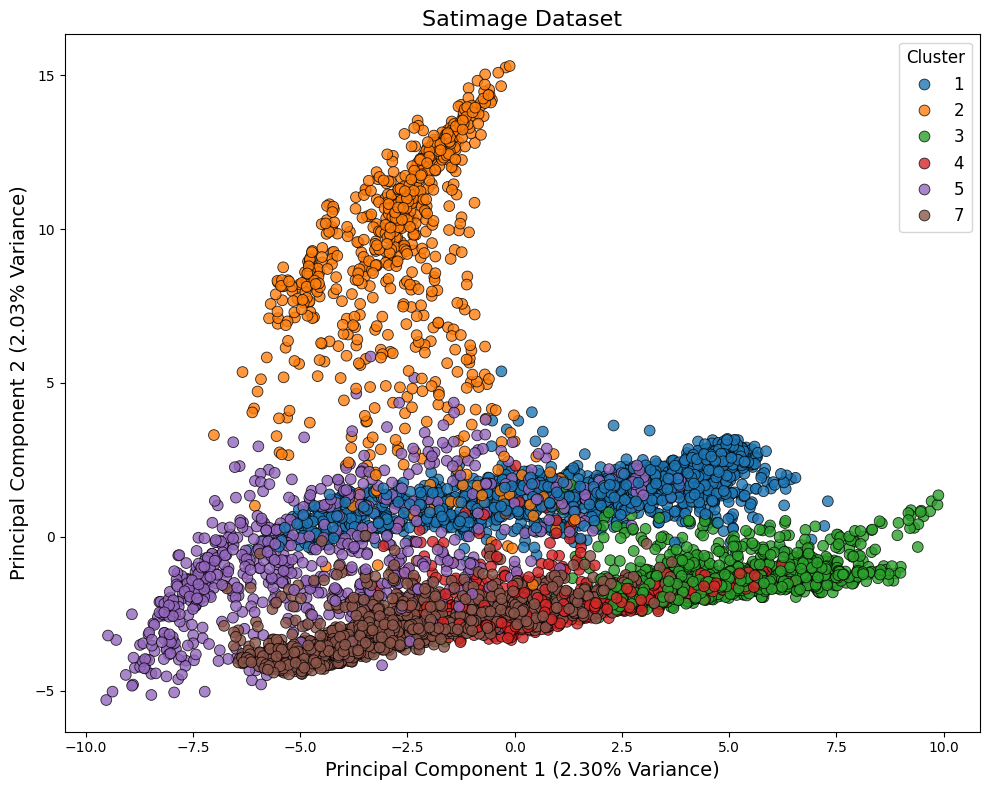

In [15]:
## --- Step 8: Plot New Subspaces --- ##
print("\n--- Step 8: Plotting PCA Subspace for Satimage ---")
pca.plot_pca_subspace(projected_satimage, labels_satimage, 'Satimage')


--- Step 8: Plotting PCA Subspace for Splice ---


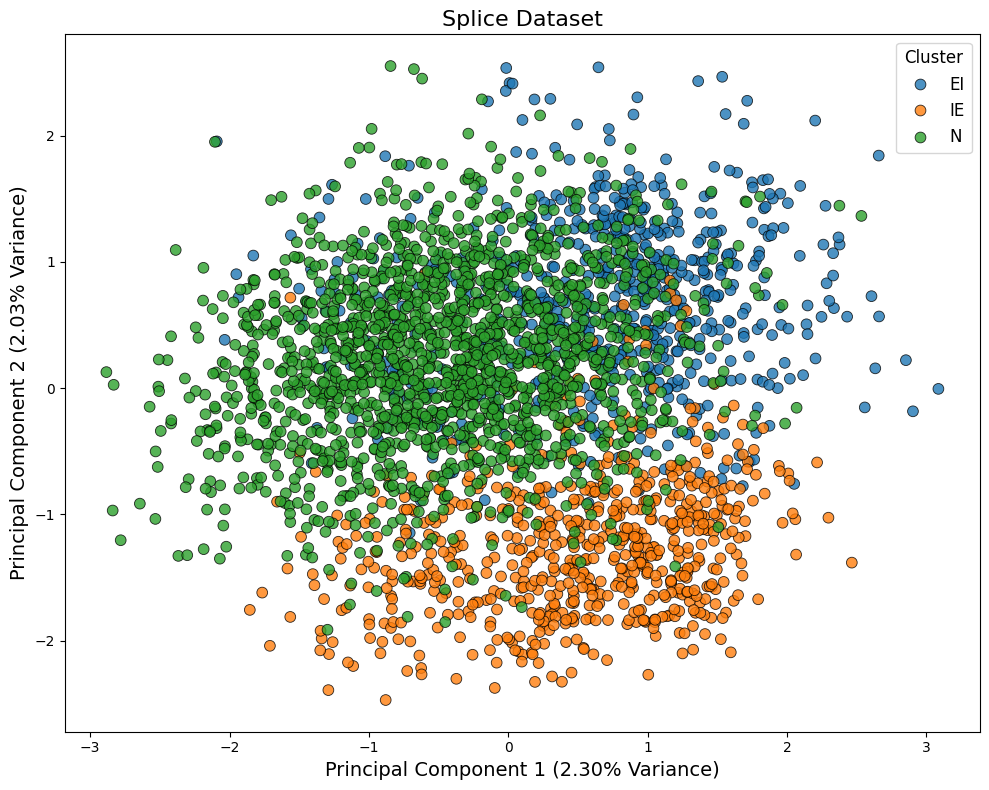

In [15]:
print("\n--- Step 8: Plotting PCA Subspace for Splice ---")
pca.plot_pca_subspace(projected_splice, labels_splice, 'Splice')

In [16]:
## --- Step 9: Reconstruct and Plot Datasets --- ##
print("\n--- Step 9: Reconstructing Data from PCA Subspace ---")
reconstructed_satimage = pca._reconstruct_data(projected_satimage, mean_vec_satimage, sorted_eigenvectors_satimage)
reconstructed_splice   = pca._reconstruct_data(projected_splice,   mean_vec_splice,   sorted_eigenvectors_splice)


--- Step 9: Reconstructing Data from PCA Subspace ---


In [17]:
from sklearn.metrics import mean_squared_error

mse_satimage = mean_squared_error(df_satimage, reconstructed_satimage)
print(f"Mean Squared Error between original and reconstructed Satimage data: {mse_satimage:.4f}")

mse_splice = mean_squared_error(df_satimage, reconstructed_satimage)
print(f"Mean Squared Error between original and reconstructed Splice data: {mse_splice:.4f}")

Mean Squared Error between original and reconstructed Satimage data: 0.1477
Mean Squared Error between original and reconstructed Splice data: 0.1477



--- Plotting Reconstructed vs Original Satimage Data ---


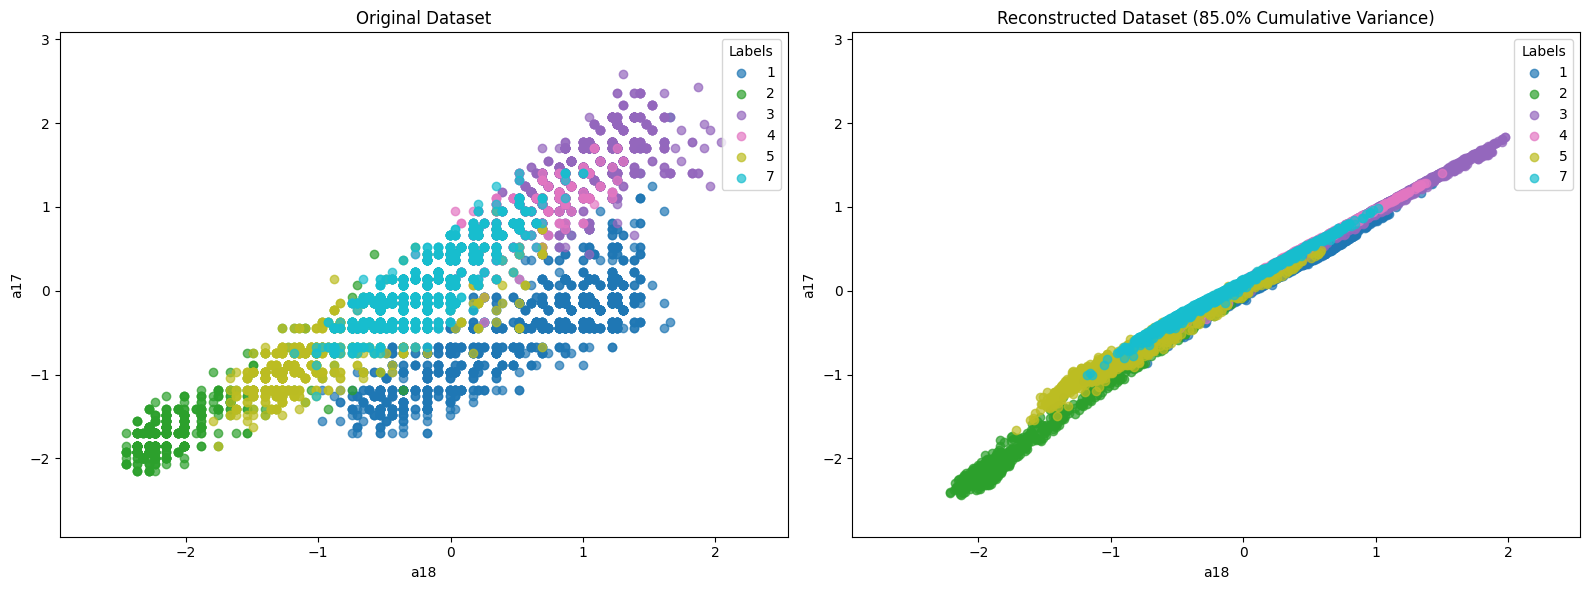


--- Plotting Reconstructed vs Original Splice Data ---


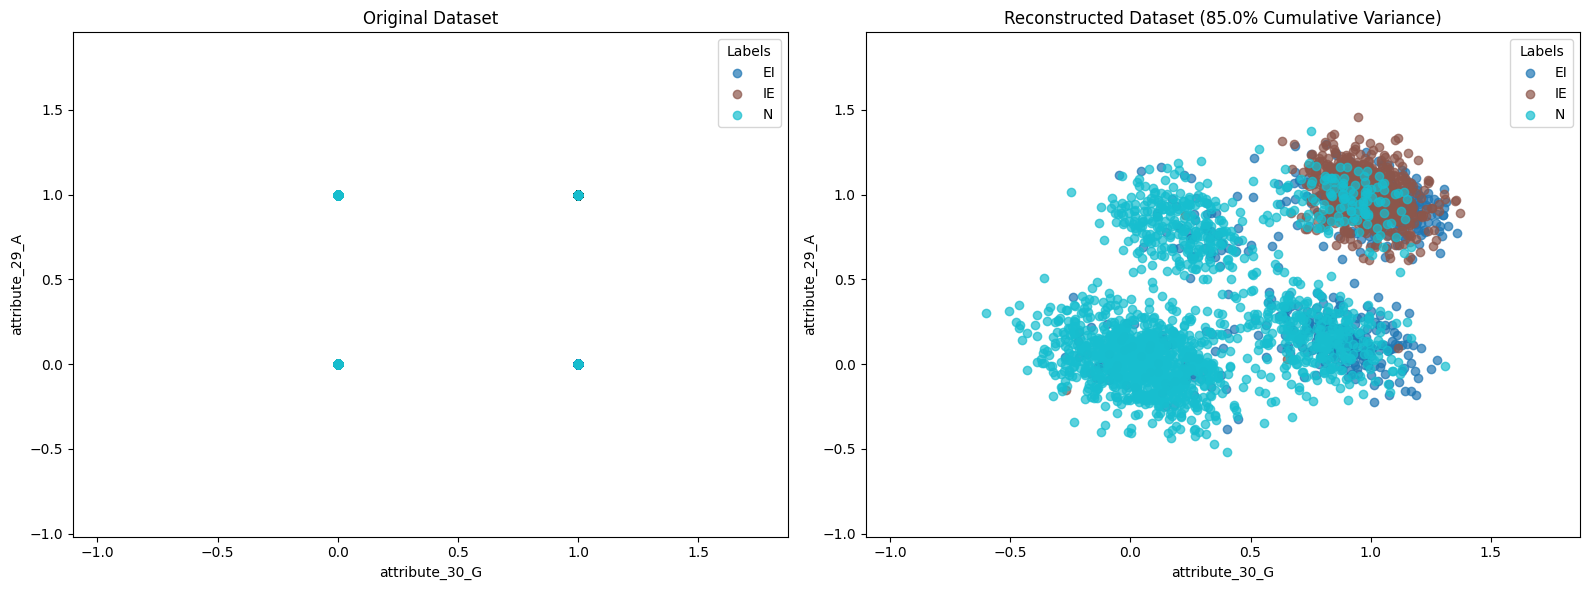

In [18]:
# Plot Reconstructed Data vs Original Data for comparison
print("\n--- Plotting Reconstructed vs Original Satimage Data ---")
pca.plot_original_and_reconstructed_dataset(df_satimage, reconstructed_satimage, labels_satimage, 2)

print("\n--- Plotting Reconstructed vs Original Splice Data ---")
pca.plot_original_and_reconstructed_dataset(df_splice, reconstructed_splice, labels_splice, 2)

# **2. sklearn.PCA and sklearn.IncrementalPCA**

Compare and analyze your results to the ones obtained using sklearn.decomposition.PCA and sklearn.decomposition.IncrementalPCA library.

In [21]:
import os
import time
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA, IncrementalPCA
from preprocessing import DataLoader, DataProcessor
from PCA.PCA import imlPCA  # Import your custom PCA

# Initialize classes
data_loader = DataLoader()
data_processor = DataProcessor()

# Create results directory
os.makedirs('results', exist_ok=True)

# Initialize your custom PCA
custom_pca = imlPCA()

# Load Datasets
datasets_info = {
    'satimage': data_loader.load_arff_data('satimage'),
    'splice': data_loader.load_arff_data('splice'),
}

# Dictionary to store fit times
fit_times = {}

# Preprocess and perform PCA & Incremental PCA & Custom PCA
preprocessed_datasets = {}
for dataset_name, (df, labels) in datasets_info.items():
    print(f"\nProcessing dataset: {dataset_name}")
    preprocessed_df = data_processor.preprocess_dataset(df)

    # Initialize a dictionary to store times for this dataset
    fit_times[dataset_name] = {}

    # --- Custom PCA ---
    start_time = time.time()
    custom_pca_result = custom_pca.fit_transform(preprocessed_df)
    end_time = time.time()
    fit_times[dataset_name]['Custom PCA'] = end_time - start_time
    
    # If custom_pca_result is a DataFrame, convert it to a NumPy array
    if isinstance(custom_pca_result, pd.DataFrame):
        custom_pca_result = custom_pca_result.values

    # Obtain the explained variance ratio (in %) from your custom PCA
    custom_pca_variance_ratio = custom_pca.explained_variance_ratio_ * 100

    # Determine number of components for 85% explained variance
    cumulative_variance = custom_pca.explained_variance_ratio_.cumsum()
    n_components_85 = np.argmax(cumulative_variance >= 0.85) + 1
    print(f"Number of components to reach 85% variance for {dataset_name}: {n_components_85}")
    
    # Save Custom PCA results to CSV
    custom_pca_df = pd.DataFrame(custom_pca_result, columns=[f'Custom_PC{i+1}' for i in range(custom_pca_result.shape[1])])
    custom_pca_df['label'] = labels
    
    output_file_custom_pca = os.path.join('results', f'{dataset_name}_custom_pca_results.csv')
    custom_pca_df.to_csv(output_file_custom_pca, index=False)
    print(f"Custom PCA results saved to {output_file_custom_pca}")
    
    # --- Sklearn PCA ---
    start_time = time.time()
    standard_pca = PCA(n_components=n_components_85)
    pca_result = standard_pca.fit_transform(preprocessed_df)
    end_time = time.time()
    fit_times[dataset_name]['Sklearn PCA'] = end_time - start_time

    # Calculate explained variance ratio (in %)
    pca_variance_ratio = standard_pca.explained_variance_ratio_ * 100
    
    # Save Sklearn PCA results to CSV
    pca_df = pd.DataFrame(pca_result, columns=[f'PC{i+1}' for i in range(pca_result.shape[1])])
    pca_df['label'] = labels
    
    output_file_pca = os.path.join('results', f'{dataset_name}_sklearn_pca_results.csv')
    pca_df.to_csv(output_file_pca, index=False)
    print(f"Sklearn PCA results saved to {output_file_pca}")
    
    # --- Incremental PCA ---
    start_time = time.time()
    ipca = IncrementalPCA(n_components=n_components_85)
    ipca_result = ipca.fit_transform(preprocessed_df)
    end_time = time.time()
    fit_times[dataset_name]['Incremental PCA'] = end_time - start_time

    # Calculate explained variance ratio (in %)
    ipca_variance_ratio = ipca.explained_variance_ratio_ * 100
    
    # Save Incremental PCA results to CSV
    ipca_df = pd.DataFrame(ipca_result, columns=[f'PC{i+1}' for i in range(ipca_result.shape[1])])
    ipca_df['label'] = labels
    
    output_file_ipca = os.path.join('results', f'{dataset_name}_sklearn_incremental_pca_results.csv')
    ipca_df.to_csv(output_file_ipca, index=False)
    print(f"Incremental PCA results saved to {output_file_ipca}")
    
    # Store all PCA results and labels in the dictionary for plotting
    preprocessed_datasets[dataset_name] = {
        'custom_pca_result': custom_pca_result,
        'custom_pca_variance_ratio': custom_pca_variance_ratio,
        'sklearn_pca_result': pca_result,
        'sklearn_pca_variance_ratio': pca_variance_ratio,
        'sklearn_ipca_result': ipca_result,
        'sklearn_ipca_variance_ratio': ipca_variance_ratio,
        'labels': labels
    }

# Print the fit times
print("\nFit times (in seconds) for each dataset and implementation:")
for dataset_name, times in fit_times.items():
    print(f"\nDataset: {dataset_name}")
    for method, duration in times.items():
        print(f"{method}: {duration:.4f} seconds")


Processing dataset: satimage
Selected top 2 eigenvectors to reach at least 85% (reached 85.23%) cumulative explained variance.

Number of components to reach 85% variance for satimage: 2
Custom PCA results saved to results\satimage_custom_pca_results.csv
Sklearn PCA results saved to results\satimage_sklearn_pca_results.csv
Incremental PCA results saved to results\satimage_sklearn_incremental_pca_results.csv

Processing dataset: splice
Selected top 133 eigenvectors to reach at least 85% (reached 85.17%) cumulative explained variance.

Number of components to reach 85% variance for splice: 133
Custom PCA results saved to results\splice_custom_pca_results.csv
Sklearn PCA results saved to results\splice_sklearn_pca_results.csv
Incremental PCA results saved to results\splice_sklearn_incremental_pca_results.csv

Fit times (in seconds) for each dataset and implementation:

Dataset: satimage
Custom PCA: 0.0060 seconds
Sklearn PCA: 0.0040 seconds
Incremental PCA: 0.0290 seconds

Dataset: splic

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

def plot_pca_results(custom_pca_result, sklearn_pca_result, sklearn_ipca_result, labels,
    custom_pca_variance_ratio=None, sklearn_pca_variance_ratio=None, sklearn_ipca_variance_ratio=None, dataset_name='Dataset'):
    """
    Plot Custom PCA, Standard PCA, and Incremental PCA results in a 1x3 grid.

    Parameters:
    - custom_pca_result (numpy.ndarray): Custom PCA-transformed data.
    - sklearn_pca_result (numpy.ndarray): Standard PCA-transformed data.
    - sklearn_ipca_result (numpy.ndarray): Incremental PCA-transformed data.
    - labels (array-like): Target labels.
    - custom_pca_variance_ratio (array-like): Explained variance ratios for Custom PCA.
    - sklearn_pca_variance_ratio (array-like): Explained variance ratios for Standard PCA.
    - sklearn_ipca_variance_ratio (array-like): Explained variance ratios for Incremental PCA.
    - dataset_name (str): Name of the dataset for titles.
    """
    # Ensure labels are a NumPy array for masking
    labels = np.array(labels)

    # Create a mirrored version of Custom PCA results by flipping the first principal component
    mirrored_custom_pca = custom_pca_result.copy()
    if dataset_name == "Satimage":
        mirrored_custom_pca[:, 0] *= -1  # Flip the x-axis for mirroring
    elif dataset_name == "Splice":
        mirrored_custom_pca[:, 1] *= -1  # Flip the y-axis for mirroring
    
    # Create DataFrames for Seaborn 2D scatter plots
    custom_pca_df = pd.DataFrame({
        'Principal Component 1': mirrored_custom_pca[:, 0],
        'Principal Component 2': mirrored_custom_pca[:, 1],
        'Cluster': labels
    })
    
    sklearn_pca_df = pd.DataFrame({
        'Principal Component 1': sklearn_pca_result[:, 0],
        'Principal Component 2': sklearn_pca_result[:, 1],
        'Cluster': labels
    })
    
    sklearn_ipca_df = pd.DataFrame({
        'Principal Component 1': sklearn_ipca_result[:, 0],
        'Principal Component 2': sklearn_ipca_result[:, 1],
        'Cluster': labels
    })
    
    # Initialize the matplotlib figure and axes
    fig, axes = plt.subplots(1, 3, figsize=(24, 8))  # 1 row x 3 columns
    
    # Define a common palette
    unique_labels = sorted(set(labels))
    palette = sns.color_palette('tab10', n_colors=len(unique_labels))
    
    # --- Subplot 1: Custom PCA ---
    sns.scatterplot(
        data=custom_pca_df,
        x='Principal Component 1',
        y='Principal Component 2',
        hue='Cluster',
        palette=palette,
        s=60,
        alpha=0.8,
        edgecolor='k',
        ax=axes[0]
    )
    axes[0].set_title(f'Custom PCA', fontsize=16)
    axes[0].set_xlabel(f'Principal Component 1 ({custom_pca_variance_ratio[0]:.2f}% Variance)', fontsize=14)
    axes[0].set_ylabel(f'Principal Component 2 ({custom_pca_variance_ratio[1]:.2f}% Variance)', fontsize=14)
    axes[0].legend(title='Cluster', fontsize=12, title_fontsize=12)
    
    # --- Subplot 2: Standard PCA ---
    sns.scatterplot(
        data=sklearn_pca_df,
        x='Principal Component 1',
        y='Principal Component 2',
        hue='Cluster',
        palette=palette,
        s=60,
        alpha=0.8,
        edgecolor='k',
        ax=axes[1],
        legend=False  # Disable legend to avoid repetition
    )
    axes[1].set_title(f'Sklearn PCA', fontsize=16)
    axes[1].set_xlabel(f'Principal Component 1 ({sklearn_pca_variance_ratio[0]:.2f}% Variance)', fontsize=14)
    axes[1].set_ylabel(f'Principal Component 2 ({sklearn_pca_variance_ratio[1]:.2f}% Variance)', fontsize=14)
    
    # --- Subplot 3: Incremental PCA ---
    sns.scatterplot(
        data=sklearn_ipca_df,
        x='Principal Component 1',
        y='Principal Component 2',
        hue='Cluster',
        palette=palette,
        s=60,
        alpha=0.8,
        edgecolor='k',
        ax=axes[2],
        legend=False  # Disable legend to avoid repetition
    )
    axes[2].set_title(f'Incremental PCA', fontsize=16)
    axes[2].set_xlabel(f'Principal Component 1 ({sklearn_ipca_variance_ratio[0]:.2f}% Variance)', fontsize=14)
    axes[2].set_ylabel(f'Principal Component 2 ({sklearn_ipca_variance_ratio[1]:.2f}% Variance)', fontsize=14)
    
    # Overall title and layout adjustments
    plt.suptitle(f'{dataset_name} PCA Visualizations', fontsize=20)
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

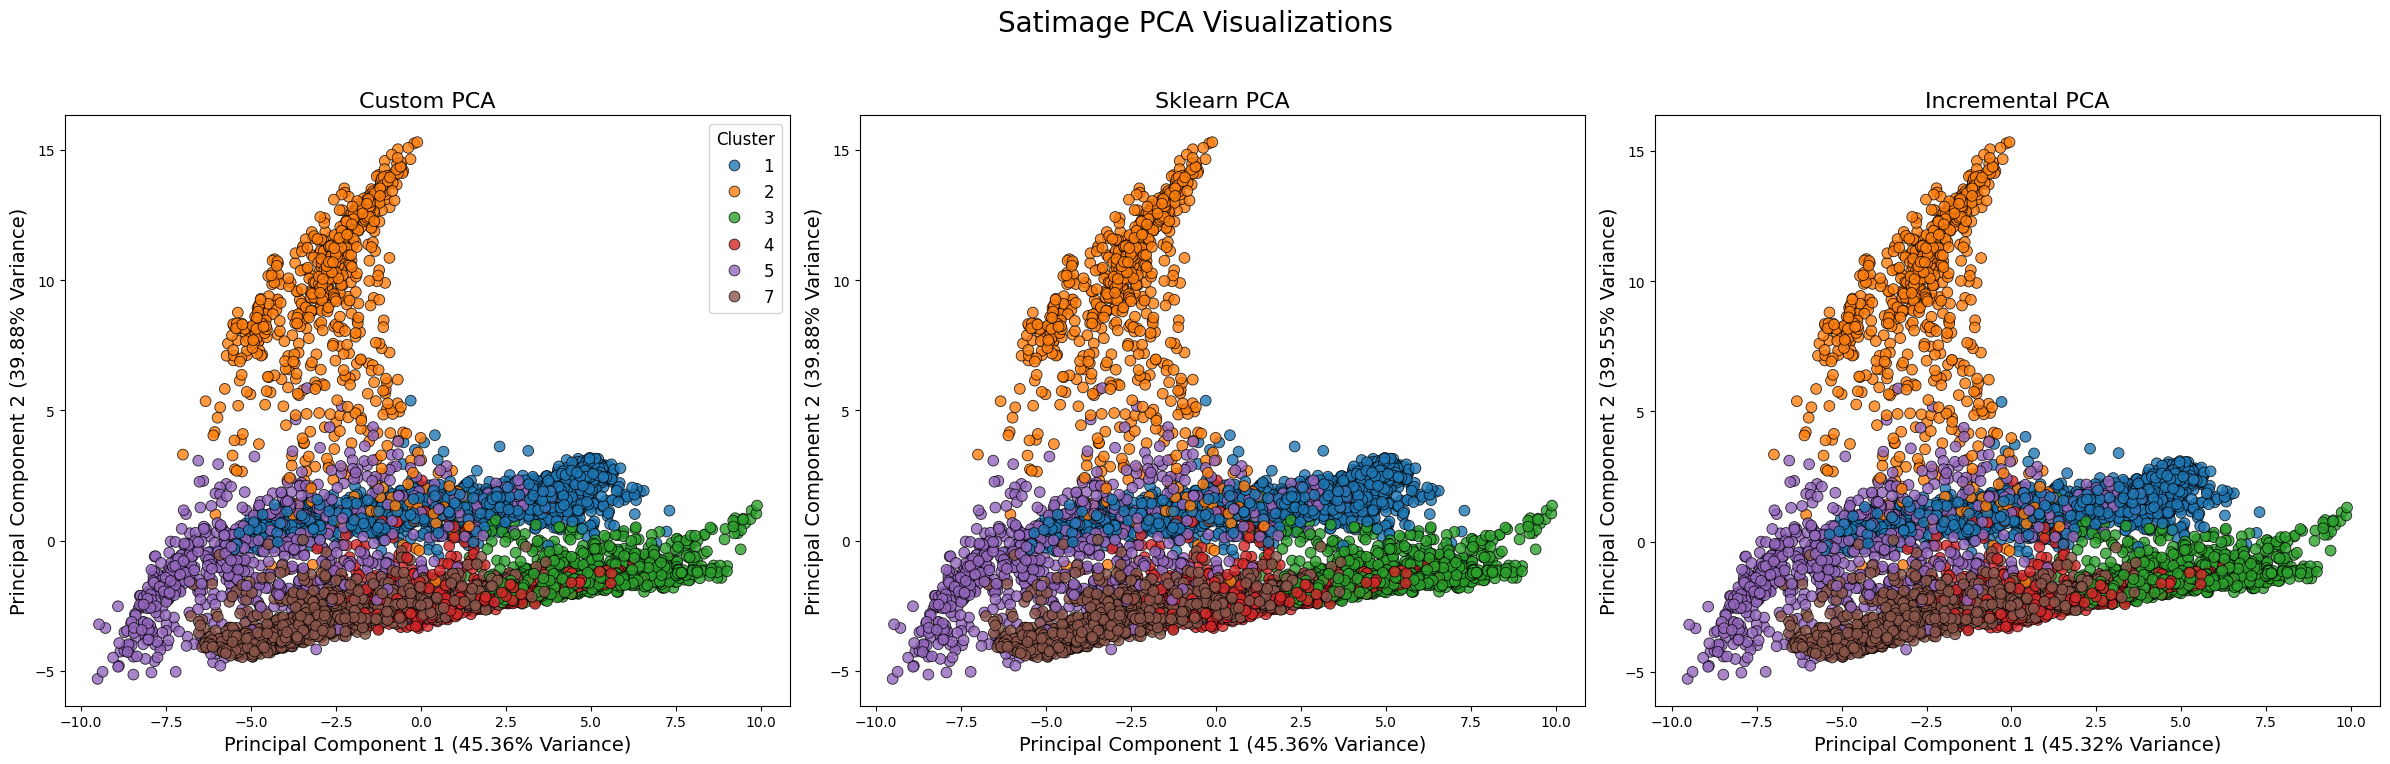

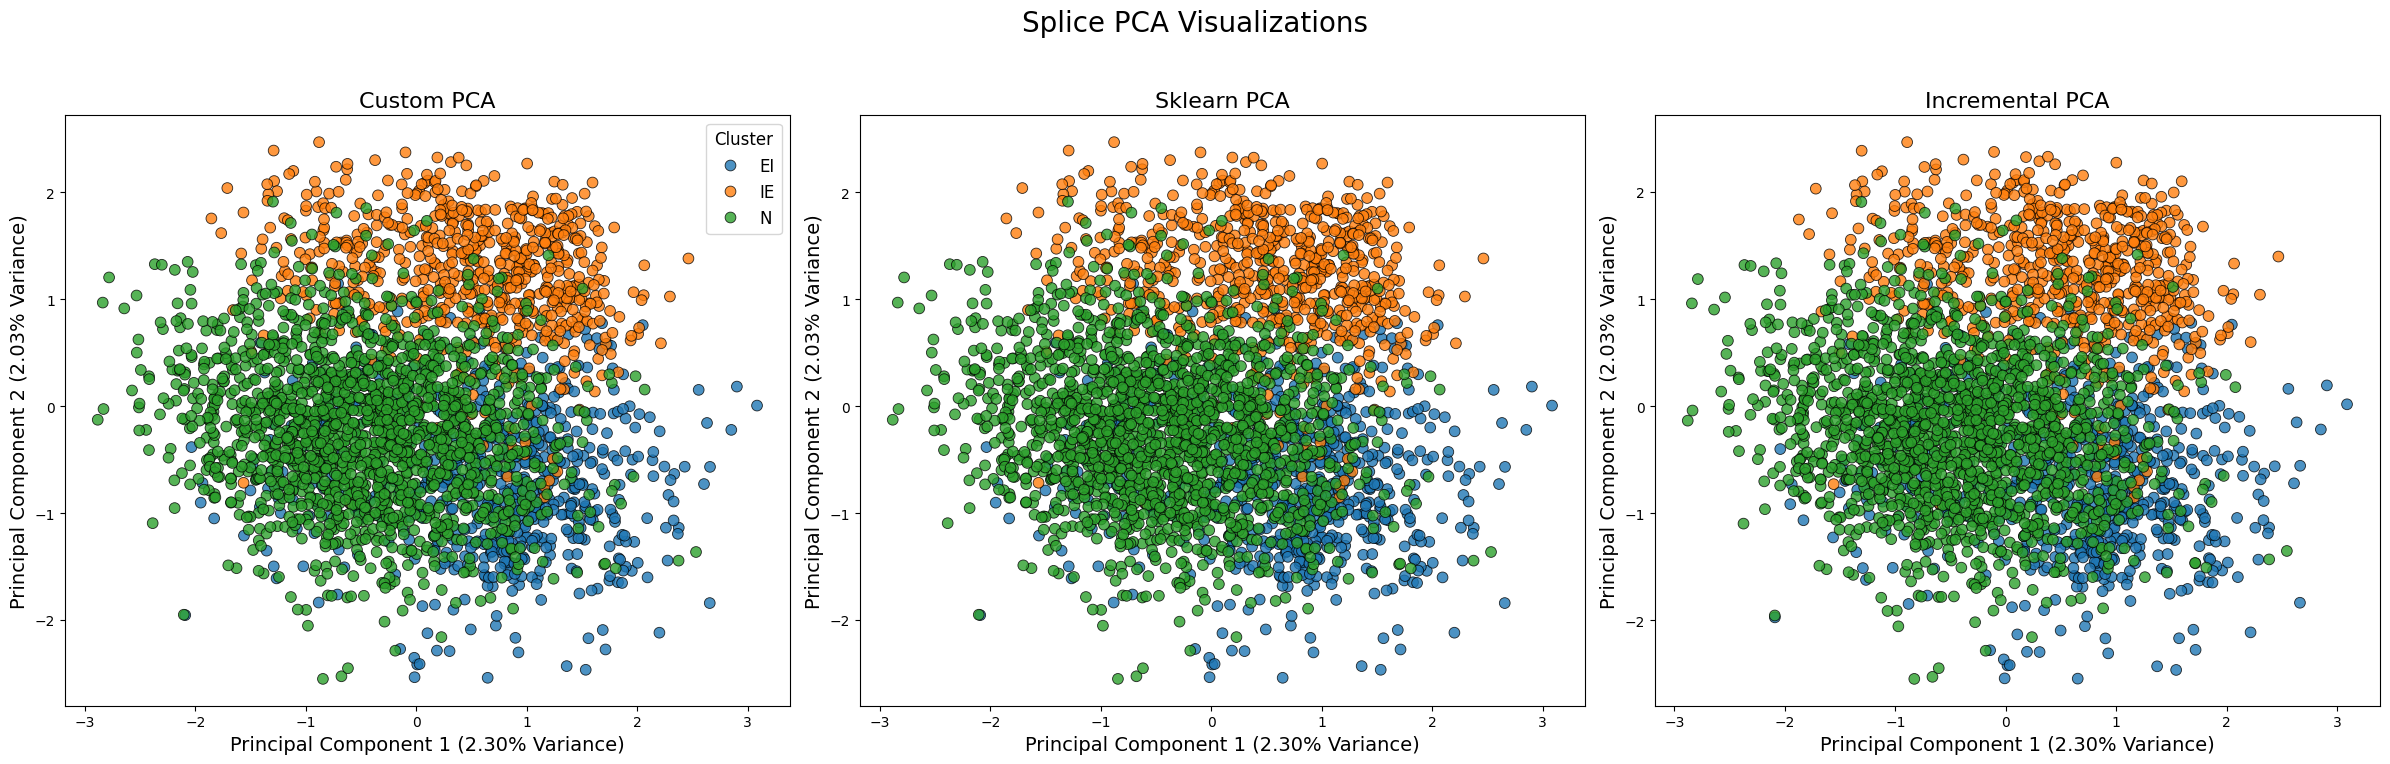

In [19]:
# --- Plotting ---
for dataset_name, data_dict in preprocessed_datasets.items():
    plot_pca_results(
        custom_pca_result=data_dict['custom_pca_result'],
        sklearn_pca_result=data_dict['sklearn_pca_result'],
        sklearn_ipca_result=data_dict['sklearn_ipca_result'],
        labels=data_dict['labels'],
        custom_pca_variance_ratio=data_dict['custom_pca_variance_ratio'],
        sklearn_pca_variance_ratio=data_dict['sklearn_pca_variance_ratio'],
        sklearn_ipca_variance_ratio=data_dict['sklearn_ipca_variance_ratio'],
        dataset_name=dataset_name.capitalize()
    )

Selected top 36 eigenvectors to reach at least 99.99% (reached 100.00%) cumulative explained variance.



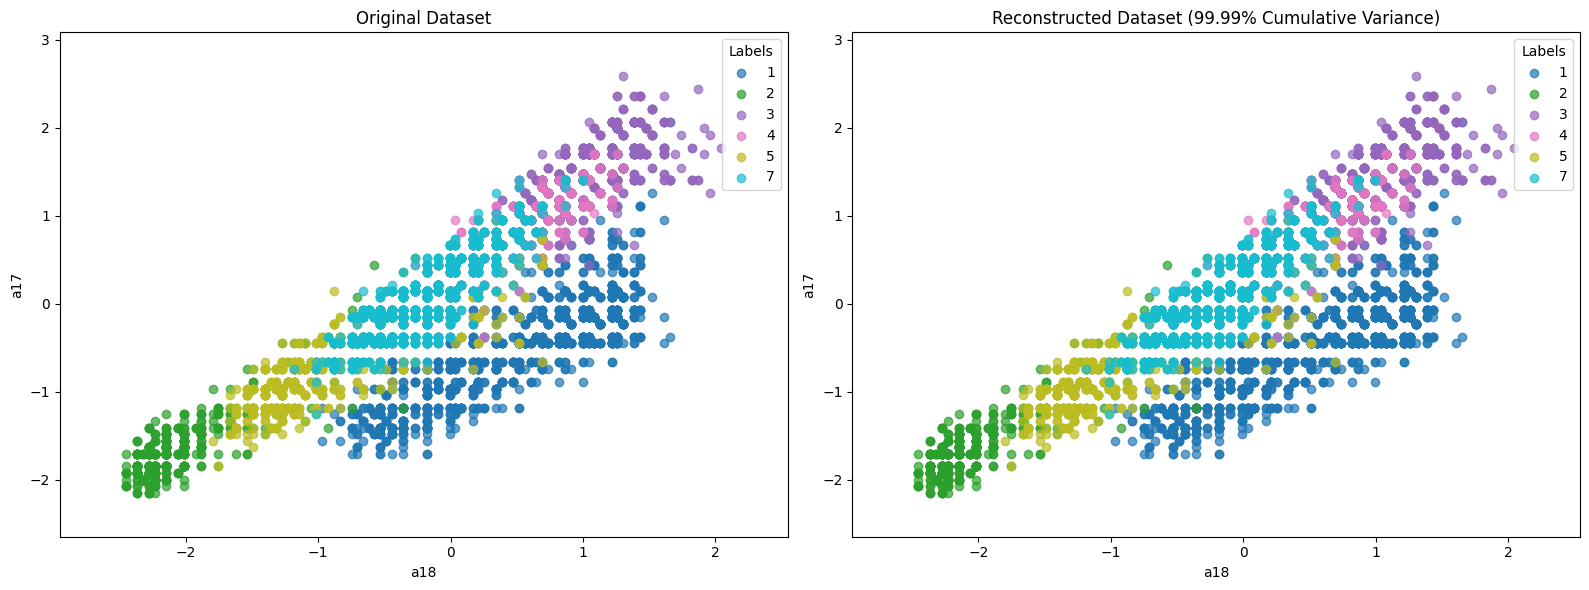

In [ ]:
from preprocessing.data_loader import DataLoader
from preprocessing.data_processor import DataProcessor 
from PCA.PCA import imlPCA

# Initialize PCA
pca = imlPCA()

## --- Step 1 --- ##
# Initialize DataLoader and DataProcessor
data_loader    = DataLoader()
data_processor = DataProcessor()

# Load Datasets
df_satimage, labels_satimage = data_loader.load_arff_data('satimage')
df_splice,   labels_splice   = data_loader.load_arff_data('splice')

# Preprocess Datasets
df_satimage = data_processor.preprocess_dataset(df_satimage)
df_splice   = data_processor.preprocess_dataset(df_splice)

mean_vec_satimage = pca._compute_mean_vector(df_satimage.values)
cov_matrix_satimage = pca._compute_covariance_matrix(df_satimage, mean_vec_satimage)
eigenvalues_satimage, eigenvectors_satimage = pca._eigen_decomposition(cov_matrix_satimage)

sorted_eigenvalues_satimage_85, sorted_eigenvectors_satimage_85 = pca._sort_eigens(eigenvalues_satimage, eigenvectors_satimage)
sorted_eigenvalues_satimage_9999, sorted_eigenvectors_satimage_9999 = pca._sort_eigens(eigenvalues_satimage, eigenvectors_satimage, cumulative_threshold=0.9999)

projected_satimage_85 = pca._project_data(df_satimage, mean_vec_satimage, sorted_eigenvectors_satimage)
projected_satimage_9999 = pca._project_data(df_satimage, mean_vec_satimage, sorted_eigenvectors_satimage)

reconstructed_satimage_85 = pca._reconstruct_data(projected_satimage_85, mean_vec_satimage, sorted_eigenvectors_satimage_85)
reconstructed_satimage_9999 = pca._reconstruct_data(projected_satimage_9999, mean_vec_satimage, sorted_eigenvectors_satimage_9999)

pca.plot_original_and_reconstructed_dataset(df_satimage, reconstructed_satimage_85, reconstructed_satimage_9999, labels_satimage, 2)

In [4]:
from preprocessing.data_loader import DataLoader
from preprocessing.data_processor import DataProcessor 
from PCA.PCA import imlPCA

# Initialize PCA
pca = imlPCA()

## --- Step 1 --- ##
# Initialize DataLoader and DataProcessor
data_loader    = DataLoader()
data_processor = DataProcessor()

# Load Datasets
df_satimage, labels_satimage = data_loader.load_arff_data('satimage')
df_splice,   labels_splice   = data_loader.load_arff_data('splice')

# Preprocess Datasets
df_satimage = data_processor.preprocess_dataset(df_satimage)
df_splice   = data_processor.preprocess_dataset(df_splice)

projected_satimage = pca.fit_transform(df_satimage)

Selected top 2 eigenvectors to reach at least 85.0% (reached 85.23%) cumulative explained variance.

